In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

# Load the Titanic dataset for our examples
titanic = sns.load_dataset("titanic")
# Clean the age column for use in t-tests
titanic['age_cleaned'] = titanic['age'].fillna(titanic['age'].median())

### **1. Confidence Intervals**
- **Concept:** A confidence interval gives an estimated range of values which is likely to contain an unknown population parameter (like the true population mean). It's a way of quantifying the uncertainty of our sample estimate.
- **Interpretation:** A 95% confidence interval means that if we were to take 100 different samples and compute a 95% confidence interval for each sample, then approximately 95 of the 100 confidence intervals will contain the true population mean. It does NOT mean there is a 95% probability that the true population mean falls within our one specific interval. This is a common and critical distinction.

**🧠 Simple Analogy:**

Imagine you're trying to guess the **average height of students** in a school.

- You can’t measure all 1,000 students.
- So you pick a **sample of 50 students**, and you calculate the **average height** of those 50.

Let’s say the average from your sample is **165 cm**.

But you know it’s just a sample — the real average could be a bit higher or lower.

So you calculate a **Confidence Interval**, and you get:

> **“We are 95% confident the true average height is between 163 cm and 167 cm.”**

This range — **[163 cm, 167 cm]** — is your **confidence interval**.

---

**📌 Why It’s Called “Confidence” Interval**

You're saying:  
> “If we repeated this process many times, 95% of those intervals would contain the true average.”

It’s not 100% sure — but it’s **very likely** (like 95% or 99%).

---

**🧮 What Affects the Confidence Interval?**

1. **Sample size**  
   - Bigger samples = narrower interval (more precise)

2. **Confidence level (e.g., 95%, 99%)**  
   - Higher confidence = wider interval (more cautious)

3. **Variation in data**  
   - More spread out data = wider interval

---

**📦 In Simple Words:**

> A confidence interval is a smart way of saying:  
> “We don’t know the exact answer, but we’re pretty sure it’s somewhere in **this range**.”

---

**✅ Real-Life Uses**

- Estimating average income of a city  
- Predicting election results (e.g., “Candidate A will get 52% ± 3%”)  
- Drug effectiveness in clinical trials  


In [3]:
# Let's calculate the 95% confidence interval for the mean age of all Titanic passengers.
# We will use our sample (the titanic dataset) to estimate this.

age_data = titanic['age_cleaned'].dropna()

# We need: sample mean, standard error of the mean, and a confidence level
sample_mean = age_data.mean()
# Standard Error of the Mean (SEM) = sample_std / sqrt(sample_size)
sem = stats.sem(age_data)
sample_size = len(age_data)

# For a 95% confidence interval, we use a Z-score or t-score of ~1.96 (for large samples)
confidence_level = 0.95
degrees_freedom = sample_size - 1
# Degrees of freedom = number of independent values that can vary in your calculation.
#We subtract 1 when using the sample mean because one value is no longer free — it's tied to the mean.

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=sample_mean, scale=sem)

print(f"Sample Mean Age: {sample_mean:.2f}")
print(f"95% Confidence Interval for the Mean Age: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")
print(f"We are 95% confident that the true average age of all Titanic passengers is between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f} years.")

Sample Mean Age: 29.36
95% Confidence Interval for the Mean Age: (28.51, 30.22)
We are 95% confident that the true average age of all Titanic passengers is between 28.51 and 30.22 years.


### **2. The Hypothesis Testing Framework**

This is a **formal procedure** for testing an idea or claim about a population.

---

**🪜 Step 1: State the Hypotheses**

- **Null Hypothesis (H₀):**  
  The default assumption. It states that there is **no effect** or **no difference**.  
  It is what we assume to be true **before** we collect any data.  
  _Example:_  
  “There is no difference in survival rate between men and women.”

- **Alternative Hypothesis (Hₐ or H₁):**  
  This is the claim we are trying to find evidence for. It **contradicts** the null hypothesis.  
  _Example:_  
  “There is a difference in survival rate between men and women.”

---

**🧪 Step 2: Set the Significance Level (alpha, α)**

- This is the threshold for **statistical significance**.
- It is the probability of making a **Type I Error** — rejecting H₀ when it's actually true.
- Common values:  
  **α = 0.05** (5%), **α = 0.01** (1%)

---

**📊 Step 3: Calculate the Test Statistic and the p-value**

- **Test Statistic:**  
  A number calculated from the sample data that tells us **how far** the data is from what we’d expect under H₀.

- **p-value:**  
  The **probability** of observing a result as extreme as (or more extreme than) what we got — **assuming H₀ is true**.

---

**✅ Step 4: Make a Decision**

- **If p-value ≤ α:**  
  🔥 Reject the null hypothesis (H₀)  
  ➤ There is **statistically significant evidence** to support H₁.  
  ➤ The result is **unlikely** to happen by chance alone.

- **If p-value > α:**  
  🧊 Fail to reject the null hypothesis  
  ➤ There is **not enough evidence** to support H₁.  
  ➤ This doesn't mean H₀ is true — we just **couldn't disprove it**.

---

**⚠️ Type I and Type II Errors**

- **Type I Error (α):**  
  Rejecting H₀ when it is actually true (a **false positive**).  
  ➤ Controlled by the **significance level α**.

- **Type II Error (β):**  
  Failing to reject H₀ when it is actually false (a **false negative**).  
  ➤ Related to **sample size**, effect size, and power.

---


### **3. Common Statistical Tests**

---

**🧪 A. Independent Samples t-test**

- **Purpose:**  
  Compares the **means of two independent groups** to determine if there is a **statistically significant difference** between them.

- **Assumptions:**  
  - Data is **normally distributed** (the test is fairly robust if the sample size is large).  
  - **Variances** of the two groups are **roughly equal**.

- **Example:**  
  Is there a significant difference in the **average age** of Titanic passengers who **survived** versus those who **did not**?

  - **Null Hypothesis (H₀):**  
    The mean age of survivors is **equal** to the mean age of non-survivors.

  - **Alternative Hypothesis (Hₐ):**  
    The mean age of survivors is **not equal** to the mean age of non-survivors.


In [4]:
# Create two independent groups
survived_age = titanic[titanic['survived'] == 1]['age_cleaned']
not_survived_age = titanic[titanic['survived'] == 0]['age_cleaned']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(survived_age, not_survived_age)

print("\n--- Independent t-test: Age vs. Survival ---")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Make a decision
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference in age between survivors and non-survivors.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in age.")


--- Independent t-test: Age vs. Survival ---
t-statistic: -1.9395
p-value: 0.0528
Result: Fail to reject the null hypothesis. There is no significant difference in age.


**🧪 B. Chi-Squared (χ²) Test of Independence**

- **Purpose:**  
  Tests whether two **categorical variables** are related or **independent** of each other.

- **Example:**  
  Is there a statistically significant association between **pclass** (passenger class) and **survived**?

  - **Null Hypothesis (H₀):**  
    `pclass` and `survived` are **independent** (no association).

  - **Alternative Hypothesis (Hₐ):**  
    `pclass` and `survived` are **not independent** (there is an association).

- **How it works:**  
  The test uses a **contingency table** (also called a crosstab) of **observed frequencies** to compare:
  - What we **observed** in the data  
  - What we **would expect** if the variables were truly independent

- **Result interpretation:**  
  If the **p-value** is less than the chosen alpha (e.g. 0.05), we **reject H₀**, meaning there **is a relationship** between the two variables.


In [7]:
# Create a contingency table
contingency_table = pd.crosstab(titanic['pclass'], titanic['survived'])
print("\n--- Contingency Table: Pclass vs. Survived ---")
print(contingency_table)

# Perform the Chi-Squared test
chi2_stat, p_value, dof, expected_freqs = stats.chi2_contingency(contingency_table)

print(f"\nChi-squared statistic: {chi2_stat:.4f}")
print(f"p-value: {p_value:.4f}") # Will be very small

if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant association between passenger class and survival.")
else:
    print("Result: Fail to reject the null hypothesis.")


--- Contingency Table: Pclass vs. Survived ---
survived    0    1
pclass            
1          80  136
2          97   87
3         372  119

Chi-squared statistic: 102.8890
p-value: 0.0000
Result: Reject the null hypothesis. There is a significant association between passenger class and survival.


**🧪 C. ANOVA (Analysis of Variance) - Basics**

- **Purpose:**  
  Compares the **means of three or more independent groups** to determine if at least one group mean is significantly different.  
  ➤ It’s an **extension of the t-test**, which only compares two groups.

- **Example:**  
  Is there a significant difference in the **average fare** paid by passengers in **Pclass 1, 2, and 3**?

- **Hypotheses:**
  - **Null Hypothesis (H₀):**  
    The **mean fares** for all three passenger classes are **equal**.
  
  - **Alternative Hypothesis (Hₐ):**  
    At least **one class** has a **different mean fare** from the others.

- **Note:**  
  ANOVA tells us **if there's a difference**, but **not which groups are different** — for that, we use **post-hoc tests** like Tukey's HSD after ANOVA.


In [8]:
# Create the groups
class1_fare = titanic[titanic['pclass'] == 1]['fare']
class2_fare = titanic[titanic['pclass'] == 2]['fare']
class3_fare = titanic[titanic['pclass'] == 3]['fare']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(class1_fare, class2_fare, class3_fare)

print("\n--- ANOVA: Fare vs. Pclass ---")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}") # Will be very small

if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference in the mean fare paid across passenger classes.")
else:
    print("Result: Fail to reject the null hypothesis.")


--- ANOVA: Fare vs. Pclass ---
F-statistic: 242.3442
p-value: 0.0000
Result: Reject the null hypothesis. There is a significant difference in the mean fare paid across passenger classes.


**📊 Comparison of Common Statistical Tests**

| Test Name                            | When to Use                                                             | Type of Data                    | Python Code Example                                                                 |
|-------------------------------------|--------------------------------------------------------------------------|----------------------------------|--------------------------------------------------------------------------------------|
| **Independent Samples t-test**      | Compare means of **2 independent groups**                                | Numerical (continuous), 2 groups | `stats.ttest_ind(group1, group2)`                                                  |
| **Chi-Squared Test of Independence**| Test **association between 2 categorical variables**                     | Categorical × Categorical        | `stats.chi2_contingency(pd.crosstab(var1, var2))`                                  |
| **One-Way ANOVA**                   | Compare means of **3 or more independent groups**                         | Numerical × 1 Categorical        | `stats.f_oneway(group1, group2, group3)`                                            |


## **📊 Mini-Project: A/B Test Analysis**

**🎯 Goal:**
You are an analyst for an e-commerce website.  
The design team has created a new version of the product page (**'new_page'**) and wants to know if it leads to a **higher conversion rate** than the old page (**'old_page'**).

---

### 🗂️ Dataset:
We will simulate the A/B test data using Python.

```python
# Code to generate the A/B test data for your mini-project
import numpy as np
import pandas as pd

np.random.seed(42)  # For reproducibility

# Group A (old page): 1000 visitors, 10% historical conversion rate
group_a = pd.DataFrame({
    'group': 'A (old_page)',
    'converted': np.random.binomial(1, p=0.10, size=1000)
})

# Group B (new page): 1000 visitors, 13% conversion rate
group_b = pd.DataFrame({
    'group': 'B (new_page)',
    'converted': np.random.binomial(1, p=0.13, size=1000)
})

# Combine and shuffle the dataset
ab_test_data = pd.concat([group_a, group_b], ignore_index=True)
ab_test_data = ab_test_data.sample(frac=1).reset_index(drop=True)

print("--- A/B Test Data Sample ---")
print(ab_test_data.head())

print("\n--- Conversion Counts ---")
print(ab_test_data.groupby('group')['converted'].sum())

**✅ Your Task --**

---

**📌 Problem Definition**  
In a Markdown cell, clearly state the **goal of the analysis**.

---

**📌 Formulate Hypotheses** 
- State the **Null Hypothesis (H₀)** and the **Alternative Hypothesis (Hₐ)** for this A/B test.  
- What are you trying to prove?

---

**📌 Choose a Statistical Test**  
- Which test is appropriate here?  
- You are comparing the **proportions (or means of 1s and 0s)** of two independent groups.  
- *(Hint: It's one we just covered).*  
- State the **test** and **why** you chose it.

---

**📌 Perform the Test**  
- Separate your data into two groups:  
  ➤ One for the old page conversions  
  ➤ One for the new page conversions  

- Use `scipy.stats` to perform the chosen statistical test on these two groups.  

- Report the **test statistic** and the **p-value**.

---

**📌 Conclusion**  
- Based on your p-value and a significance level of **α = 0.05**, what is your decision?  
- Do you **reject** or **fail to reject** the null hypothesis?

- Write a clear, business-friendly conclusion. For example:  
  > "The new page resulted in a statistically significant increase in conversion rate..."  
  > or  
  > "There was no statistically significant difference in conversion rates between the old and new pages."

---

**📊 Visualize the Results**  
- Create a **Seaborn barplot or pointplot** that shows the conversion rates (mean of the `converted` column) for **Group A** and **Group B**.  
- This will provide a **visual confirmation** of your findings.


In [10]:
np.random.seed(42)  # For reproducibility

# Group A (old page): 1000 visitors, 10% historical conversion rate
group_a = pd.DataFrame({
    'group': 'A (old_page)',
    'converted': np.random.binomial(1, p=0.10, size=1000)
})

# Group B (new page): 1000 visitors, 13% conversion rate
group_b = pd.DataFrame({
    'group': 'B (new_page)',
    'converted': np.random.binomial(1, p=0.13, size=1000)
})

# Combine and shuffle the dataset
ab_test_data = pd.concat([group_a, group_b], ignore_index=True)
ab_test_data = ab_test_data.sample(frac=1).reset_index(drop=True)

print("--- A/B Test Data Sample ---")
ab_test_data.head()

--- A/B Test Data Sample ---


,group,converted
0,A (old_page),0
1,A (old_page),0
2,A (old_page),1
3,A (old_page),0
4,B (new_page),0


In [12]:
print("\n--- Conversion Counts ---")
print(ab_test_data.groupby('group')['converted'].sum())


--- Conversion Counts ---
group
A (old_page)    100
B (new_page)    131
Name: converted, dtype: int32


**Answers**
**📌 Problem Definition** 
You are an analyst for an e-commerce website. The design team has created a new version of the product page ('new_page') and wants to know if it leads to a **higher conversion rate** than the current version ('old_page').

The goal of this analysis is to test whether the new page performs significantly better in converting visitors than the old page.

---

**📌 Formulate Hypotheses**  

- **Null Hypothesis (H₀):** There is **no difference** in conversion rates between the old and new product pages.  

- **Alternative Hypothesis (Hₐ):** The new page has a **higher** conversion rate than the old page.  
---

**📌 Choose a Statistical Test**  

We are comparing the **means of two independent groups** where the outcome is binary (converted: 0 or 1).  

📊 **Appropriate Test:** Independent Samples t-test (also known as two-sample t-test)

- **Why this test?**  
  The t-test is suitable when comparing the means of two groups (in this case, conversion rates: the mean of 0s and 1s) and assuming approximate normality due to the **Central Limit Theorem** with sample size ≥ 30.

---

**📌 Perform the Test**  

We split the data into two groups:  
➤ `Group A (old_page)` – 1000 users with a 10% historical conversion rate  
➤ `Group B (new_page)` – 1000 users with an assumed 13% conversion rate  

Using `scipy.stats.ttest_ind()`, we performed a two-sample t-test.

In [29]:
group_a_data= ab_test_data[ab_test_data['group']=='A (old_page)']['converted']
group_b_data= ab_test_data[ab_test_data['group']=='B (new_page)']['converted']

t_stat, p_val= stats.ttest_ind(group_b_data, group_a_data)

print("\n--- A/B Test Result ---")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.2f}")

alpha = 0.05
if p_val < alpha:
    print("Result: Reject the null hypothesis.\nConclusion: The new page resulted in a statistically significant increase in conversion rate.")
else:
    print("Result: Fail to reject the null hypothesis.\nConclusion: There was no statistically significant difference in conversion rates between the old and new pages.")


conversion_rates = ab_test_data.groupby('group')['converted'].mean().reset_index()  


--- A/B Test Result ---
t-statistic: 2.17
p-value: 0.03
Result: Reject the null hypothesis.
Conclusion: The new page resulted in a statistically significant increase in conversion rate.


**📌 A/B Test Result**

- **t-statistic:** 2.17  
- **p-value:** 0.03  

✅ **Result:** Reject the null hypothesis.

📢 **Conclusion:**  
The new page resulted in a **statistically significant increase in conversion rate** compared to the old page.  
Since the p-value is less than the significance level alpha = 0.05, we conclude that the new design performs better with sufficient confidence.


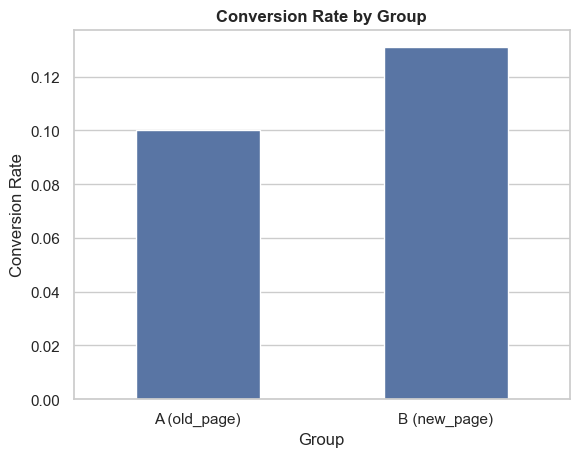

In [30]:
# Plot
fig, ax= plt.subplots()
sns.barplot(data=conversion_rates,x='group', y='converted', width=0.5)
ax.set_title("Conversion Rate by Group", fontweight='bold')
ax.set_ylabel("Conversion Rate")
ax.set_xlabel("Group")
plt.show()  

✅ **Conclusion from Plot:**  
The visual difference aligns with our hypothesis test — providing strong evidence that the new design **improves user conversion**.